In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Text(0, 0.5, 'Spending Score (1-100)')

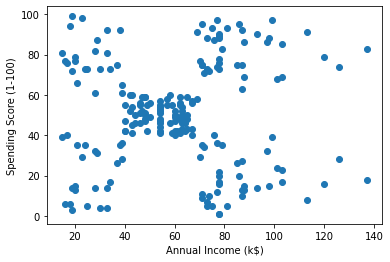

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')

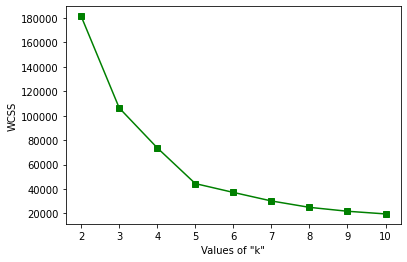

In [ ]:
df_new = df[['Annual Income (k$)','Spending Score (1-100)']].values
limit = int((df_new.shape[0]//2)**0.5)
wcss = {}
 
for k in range(2,limit+1):
    model = KMeans(n_clusters=k)
    model.fit(df_new)
    wcss[k] = model.inertia_

plt.plot(list(wcss.keys()), list(wcss.values()), 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('WCSS')
plt.show()

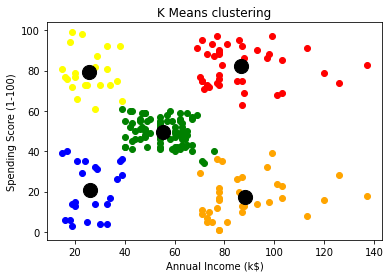

In [ ]:
model = KMeans(n_clusters=5)
pred = model.fit_predict(df_new)

colours = ['red', 'blue', 'green', 'yellow', 'orange']
 
for i in np.unique(model.labels_):
    plt.scatter(df_new[pred==i, 0],
                df_new[pred==i, 1],
                c = colours[i])
     
plt.scatter(model.cluster_centers_[:, 0],
            model.cluster_centers_[:, 1],
            s = 200,  
            c = 'black')
 
plt.title('K Means clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
df_new1 = df[['Age','Spending Score (1-100)']].values

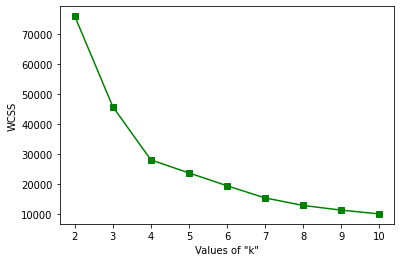

In [ ]:
limit = int((df_new1.shape[0]//2)**0.5)
wcss = {}
 
for k in range(2,limit+1):
    model = KMeans(n_clusters=k)
    model.fit(df_new1)
    wcss[k] = model.inertia_

plt.plot(list(wcss.keys()), list(wcss.values()), 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('WCSS')
plt.show()

In [ ]:
model2 = KMeans(n_clusters=5)
model2.fit(df_new1)
pred = model2.predict(df_new1)
pred

array([4, 1, 2, 1, 4, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 4, 4, 0, 1, 4, 1,
       0, 1, 0, 1, 0, 4, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 3, 1, 3, 4,
       0, 4, 3, 4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4,
       3, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 4, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4,
       4, 3, 3, 4, 3, 4, 4, 4, 3, 4, 3, 4, 4, 3, 3, 4, 3, 4, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 3, 3, 3, 3, 4, 4, 4, 1, 2, 1, 3, 1, 0, 1, 0, 1,
       4, 1, 2, 1, 0, 1, 2, 1, 0, 1, 4, 1, 2, 1, 3, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 4, 2, 1, 2, 1, 0, 1,
       0, 1, 0, 1, 2, 1, 0, 1, 3, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1], dtype=int32)

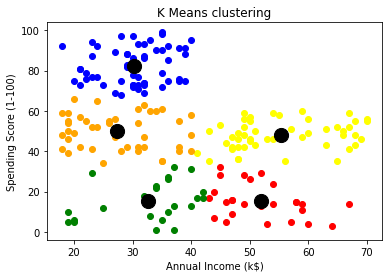

In [ ]:
colours = ['red', 'blue', 'green', 'yellow', 'orange']
 
for i in np.unique(model2.labels_):
    plt.scatter(df_new1[pred==i, 0],
                df_new1[pred==i, 1],
                c = colours[i])
     
plt.scatter(model2.cluster_centers_[:, 0],
            model2.cluster_centers_[:, 1],
            s = 200,  
            c = 'black')
 
plt.title('K Means clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

Коэффициент силуэта

In [ ]:
from sklearn import metrics

metrics.silhouette_score(df_new1, pred, metric='euclidean')

0.46119576118892147

In [ ]:
s_lst = []
ch_lst = []
db_lst = []
for n in range(2, 11):
    model = KMeans(n_clusters=n)
    model.fit(df_new1)
    pred = model.predict(df_new1)
    s_lst.append(metrics.silhouette_score(df_new1, pred))
    ch_lst.append(metrics.calinski_harabasz_score(df_new1, pred))
    db_lst.append(metrics.davies_bouldin_score(df_new1, pred))

data = {'silhouette_score': s_lst, 'calinski_harabasz_score': ch_lst, 'davies_bouldin_score': db_lst}
df_of_n_clusters = pd.DataFrame(data=data, index=[n for n in range(2, 11)])
df_of_n_clusters.index.name = 'n_clusters'
df_of_n_clusters

,silhouette_score,calinski_harabasz_score,davies_bouldin_score
n_clusters,,,
2,0.469234,249.194291,0.772220
3,0.453703,270.055294,0.823871
4,0.499739,332.563127,0.686933
5,0.436540,301.085811,0.819765
6,0.446619,301.186356,0.824465
7,0.423135,323.489938,0.821011
8,0.434108,334.136454,0.750493
9,0.415221,333.136183,0.803286
10,0.413286,333.773916,0.799722


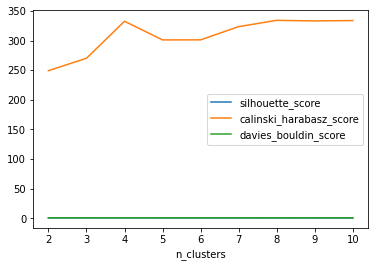

In [ ]:
df_of_n_clusters.plot()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_of_n_clusters[['calinski_harabasz_score']] = scaler.fit_transform(df_of_n_clusters[['calinski_harabasz_score']])
df_of_n_clusters

,silhouette_score,calinski_harabasz_score,davies_bouldin_score
n_clusters,,,
2,0.469234,0.000000,0.772220
3,0.453703,0.245591,0.823871
4,0.499739,0.981478,0.686933
5,0.436540,0.610904,0.819765
6,0.446619,0.612088,0.824465
7,0.423135,0.874662,0.821011
8,0.434108,1.000000,0.750493
9,0.415221,0.988224,0.803286
10,0.413286,0.995732,0.799722


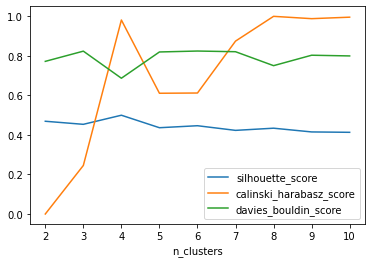

In [ ]:
df_of_n_clusters.plot()